In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
# Data exploration
df = pd.read_csv('Housing 2.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
# Check for null values in the data 
df.isnull().values.any()

np.False_

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
int64


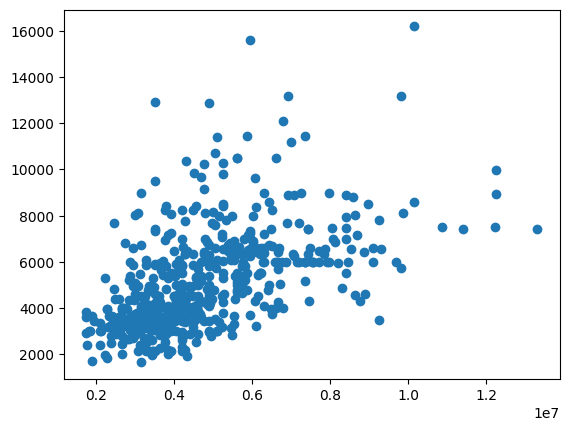

In [33]:
# visualize the data 
plt.scatter(df["price"], df["area"])
print(df.columns)
print(df["area"])

In [46]:
# the correlation here is clear between price and area 
from sklearn.model_selection import train_test_split
X = df[["price"]]
Y = df["area"]


In [58]:

# Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [59]:
# fit the x and y we have to our ML model to predict
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [60]:
# fit the training data
print(X.shape)
print(Y.shape)

# convert to numeric types

(545, 1)
(545,)


In [61]:
# fit the data now 
lr.fit(x_train, y_train)

LinearRegression()

In [62]:
# predict on our testing set 
lr.predict(x_test)

array([5319.95972958, 5201.58163034, 4609.69113416, 6927.92891088,
       4885.90669905, 5083.20353111, 4984.55511508, 5990.76895859,
       5750.06682347, 4096.7193708 , 7312.6577334 , 3741.58507309,
       7174.54995096, 5162.12226393, 7963.7372792 , 5556.71592805,
       6227.52515706, 4787.25828302, 6109.14705783, 4566.28583111,
       5142.39258073, 4491.31303492, 5473.85125859, 8003.19664561,
       4096.7193708 , 7056.17185172, 4708.33955019, 3623.20697385,
       4412.3943021 , 3958.61158836, 4471.58335172, 4960.87949523,
       4491.31303492, 5872.39085935, 5126.60883416, 5556.71592805,
       5990.76895859, 4294.01620286, 4412.3943021 , 4806.98796622,
       4254.55683645, 5043.74416469, 4570.23176775, 4215.09747004,
       5339.68941279, 3425.91014179, 5990.76895859, 4787.25828302,
       4846.44733263, 4570.23176775, 5162.12226393, 6188.06579065,
       5004.28479828, 4037.53032118, 4017.80063798, 5793.47212653,
       3899.42253874, 5754.01276012, 7371.84678302, 3796.82818

In [64]:
# test the accuracy of the model
lr.score(x_test, y_test)

0.36917118437131713

In [65]:
# Notice how this accuracy is very low, lets try some feature engineering with our other columns
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [91]:
df["price_per_sqft"]= df["price"]/ df["area"]
df["price_per_bathroom"] = df["price"] / df["bathrooms"]
df["price_per_bedroom"] = df["price"] / df["bedrooms"]
df["area_per_bedroom"] = df["area"] / df["bedrooms"]
df["stories_area_interaction"] = df["stories"] * df["area"]


df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,price_per_bedroom,mainroad_yes_True,area_per_bedroom,stories_area_interaction,bathroom,price_per_bathroom
0,13300000,7420,4,2,3,no,no,no,yes,2,yes,furnished,1792.452830,3.325000e+06,1,1855.0,22260,6650000.0,6650000.0
1,12250000,8960,4,4,4,no,no,no,yes,3,no,furnished,1367.187500,3.062500e+06,1,2240.0,35840,3062500.0,3062500.0
2,12250000,9960,3,2,2,no,yes,no,no,2,yes,semi-furnished,1229.919679,4.083333e+06,1,3320.0,19920,6125000.0,6125000.0
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes,furnished,1628.666667,3.053750e+06,1,1875.0,15000,6107500.0,6107500.0
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no,furnished,1537.735849,2.852500e+06,1,1855.0,14840,11410000.0,11410000.0


In [92]:
# using one hot encoding lets turn the categorical values into numerical binary columns
df["mainroad_yes_True"] = df["mainroad_yes_True"].astype(int)

In [93]:
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,price_per_bedroom,mainroad_yes_True,area_per_bedroom,stories_area_interaction,bathroom,price_per_bathroom
0,13300000,7420,4,2,3,no,no,no,yes,2,yes,furnished,1792.452830,3.325000e+06,1,1855.0,22260,6650000.0,6650000.0
1,12250000,8960,4,4,4,no,no,no,yes,3,no,furnished,1367.187500,3.062500e+06,1,2240.0,35840,3062500.0,3062500.0
2,12250000,9960,3,2,2,no,yes,no,no,2,yes,semi-furnished,1229.919679,4.083333e+06,1,3320.0,19920,6125000.0,6125000.0
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes,furnished,1628.666667,3.053750e+06,1,1875.0,15000,6107500.0,6107500.0
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no,furnished,1537.735849,2.852500e+06,1,1855.0,14840,11410000.0,11410000.0


In [94]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price_per_sqft', 'price_per_bedroom',
       'mainroad_yes_True', 'area_per_bedroom', 'stories_area_interaction',
       'bathroom', 'price_per_bathroom'],
      dtype='object')

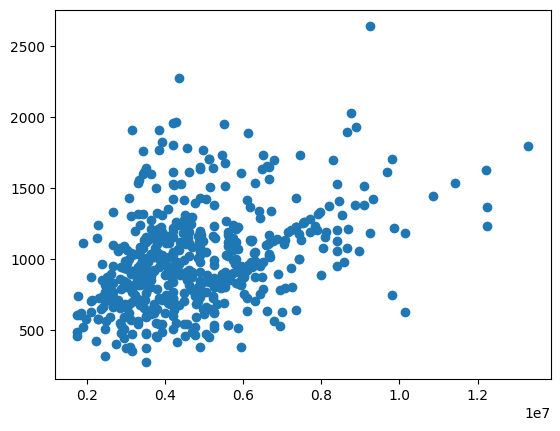

In [99]:
plt.scatter(df["price"], df["price_per_sqft"])